# Lab 09 - Frequent Patterns
Name: Andrew Hawk  
Class: CSCI 349 - Intro to Data Mining  
Semester: 2020SP  
Instructor: Brain King  

6.5 hrs

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

### 2) [P] Go to the page: http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/ . Enter the list dataset shown on the page. Then, copy the example code that transforms the list to a numpy encoded array, then to a pandas DataFrame with the correct column names. Output your data frame.

In [2]:
dataset = [['Milk', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Dill', 'Onion', 'Nutmeg', 'Kidney Beans', 'Eggs', 'Yogurt'],
           ['Milk', 'Apple', 'Kidney Beans', 'Eggs'],
           ['Milk', 'Unicorn', 'Corn', 'Kidney Beans', 'Yogurt'],
           ['Corn', 'Onion', 'Onion', 'Kidney Beans', 'Ice cream', 'Eggs']]

te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


### 3) [P] Show the result of describe() and info() on your dataframe.

In [3]:
display(df.describe())
display(df.info())

,Apple,Corn,Dill,Eggs,Ice cream,Kidney Beans,Milk,Nutmeg,Onion,Unicorn,Yogurt
count,5,5,5,5,5,5,5,5,5,5,5
unique,2,2,2,2,2,1,2,2,2,2,2
top,False,False,False,True,False,True,True,False,True,False,True
freq,4,3,4,4,4,5,3,3,3,4,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 11 columns):
Apple           5 non-null bool
Corn            5 non-null bool
Dill            5 non-null bool
Eggs            5 non-null bool
Ice cream       5 non-null bool
Kidney Beans    5 non-null bool
Milk            5 non-null bool
Nutmeg          5 non-null bool
Onion           5 non-null bool
Unicorn         5 non-null bool
Yogurt          5 non-null bool
dtypes: bool(11)
memory usage: 183.0 bytes


None

### 4) [P] Following along the mlxtend user guide, use the apriori algorithm to final all frequent itemsets with a min_support of 0.6. Show the resulting dataframe, and store the result, since you'll have many selection exercises next. All selection exercises must be done from this resulting frame. Set use_colnames=True. It'll be much easier to interpret your patterns.

In [4]:
apriori(df, min_support=0.6, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.6,(Milk)
3,0.6,(Onion)
4,0.6,(Yogurt)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"


### 5) [P] Select all frequent itemsets that have support => 0.8

In [5]:
apriori(df, min_support=0.8, use_colnames=True)

,support,itemsets
0,0.8,(Eggs)
1,1.0,(Kidney Beans)
2,0.8,"(Kidney Beans, Eggs)"


### 6) [P] Select all frequent itemsets with at least 2 items. In their documentation, they often create additional helper variables to make it easier to select your data. That's entirely up to you. (I tend to be a purist, and reserve additional variables for only very complex selection criteria. Computing the length of an itemset is not one of them! It's entirely up to you.)

In [6]:
frequent_itemsets = apriori(df, use_colnames=True)
sel = frequent_itemsets['itemsets'].apply(lambda x: len(x)>1)
frequent_itemsets[sel]

,support,itemsets
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"
10,0.6,"(Onion, Kidney Beans, Eggs)"


### 7) [P] Select the frequent itemsets that contain an 'Onion' in the itemset.

In [7]:
sel = frequent_itemsets['itemsets'].apply(lambda x: "Onion" in x)
frequent_itemsets[sel]

,support,itemsets
3,0.6,(Onion)
6,0.6,"(Onion, Eggs)"
8,0.6,"(Onion, Kidney Beans)"
10,0.6,"(Onion, Kidney Beans, Eggs)"


### 8) [P] Select the frequent itemsets that contain both 'Onion' and 'Eggs' in the itemset. (HINT: You should have 2 frequent itemsets selected. And, if you haven't learned about the set type in Python and all of the standard set operations, they can really make these types of questions much easier.)

In [8]:
sel = frequent_itemsets['itemsets'].apply(lambda x: ("Onion" in x and "Eggs" in x))
frequent_itemsets[sel]

,support,itemsets
6,0.6,"(Onion, Eggs)"
10,0.6,"(Onion, Kidney Beans, Eggs)"


### 9) [P] Select the frequent itemsets that contain either an 'Onion' or 'Kidney Beans' (or both) in the itemset. (HINT: You should have 8 frequent itemsets output.)

In [9]:
sel = frequent_itemsets['itemsets'].apply(lambda x: ("Onion" in x or "Kidney Beans" in x))
frequent_itemsets[sel]

,support,itemsets
1,1.0,(Kidney Beans)
3,0.6,(Onion)
5,0.8,"(Kidney Beans, Eggs)"
6,0.6,"(Onion, Eggs)"
7,0.6,"(Milk, Kidney Beans)"
8,0.6,"(Onion, Kidney Beans)"
9,0.6,"(Kidney Beans, Yogurt)"
10,0.6,"(Onion, Kidney Beans, Eggs)"


### 10) [P] http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/ contains the all the information about the association rule interestingness metrics, as well as giving you the code to generate the association rules. (NOTE – they mention a function called generate_rules(). The function is association_rules().) Generate rules with a minimum confidence of 0.7. Store your resulting data frame called rules. Show the entire data frame. (You should have 12 rules).

In [10]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.80,1.00,0.00,1.0
1,(Eggs),(Kidney Beans),0.8,1.0,0.8,1.00,1.00,0.00,inf
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(Milk),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(Onion),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Yogurt),(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
8,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
9,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6


### 11) [P] Output the top 5 rules in descending order by "lift", with the secondary sort key by "confidence".

In [11]:
rules.sort_values(by=["lift", "confidence"], ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Onion),(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
7,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
10,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(Eggs),(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
9,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6


### 12) [P] Select all rules that have a 1.0 support for the antecedent.

In [12]:
rules[rules['antecedent support']>=1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Kidney Beans),(Eggs),1.0,0.8,0.8,0.8,1.0,0.0,1.0


### 13) [P] Select all rules that have at least 3 or more items represented in the rule (i.e. the union of the antecedent and consequent >= 3.)

In [13]:
sel = rules.apply(lambda row: len(row.antecedents.union(row.consequents)) >= 3, axis=1)
rules[sel]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.00,1.25,0.12,inf
8,"(Onion, Eggs)",(Kidney Beans),0.6,1.0,0.6,1.00,1.00,0.00,inf
9,"(Kidney Beans, Eggs)",(Onion),0.8,0.6,0.6,0.75,1.25,0.12,1.6
10,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.00,1.25,0.12,inf
11,(Eggs),"(Onion, Kidney Beans)",0.8,0.6,0.6,0.75,1.25,0.12,1.6


### 14) [P] Select the rules that have confidence >= 0.75 and a lift > 1

In [14]:
sel = rules.apply(lambda row: (row.confidence >= 0.75 and row.lift > 1), axis=1)
rules[sel]

# The rows with confidence = 0.75 actually have confidence = 0.7499999999999
#sel = rules.apply(lambda row: print(row.confidence, "   ", row.lift), axis=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(Onion),(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
7,"(Onion, Kidney Beans)",(Eggs),0.6,0.8,0.6,1.0,1.25,0.12,inf
10,(Onion),"(Kidney Beans, Eggs)",0.6,0.8,0.6,1.0,1.25,0.12,inf


# Chipotle Data

### 16) [P] Read in the Chipotle dataset: url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv' df_chip = pd.read_csv(url, sep = '\t')

In [15]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
df_chip = pd.read_csv(url, sep = '\t')

### 17) [P] Show the result of df_chip.info(verbose=True) You should have five variables.

In [16]:
df_chip.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### 18) [P] Show the result of describe(include='all')

In [17]:
df_chip.describe(include='all')

,order_id,quantity,item_name,choice_description,item_price
count,4622.000000,4622.000000,4622,3376,4622
unique,NaN,NaN,50,1043,78
top,NaN,NaN,Chicken Bowl,[Diet Coke],$8.75
freq,NaN,NaN,726,134,730
mean,927.254868,1.075725,NaN,NaN,NaN
std,528.890796,0.410186,NaN,NaN,NaN
min,1.000000,1.000000,NaN,NaN,NaN
25%,477.250000,1.000000,NaN,NaN,NaN
50%,926.000000,1.000000,NaN,NaN,NaN
75%,1393.000000,1.000000,NaN,NaN,NaN


### 19) [P] Show the first 10 observations

In [18]:
df_chip.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### 20) [M] Study what you see so far. Minimally, you should notice that you have three variables that need to be transformed into usable types. Which ones, and what do you need to do with them?

item-price needs to be converted to a float.  
order_id and quantity need to be downcasted.

### 21) [P] Let's start doing some preprocessing. Convert the item_price field to a floating-point number.

In [19]:
df_chip.item_price = df_chip.item_price.apply(lambda price: price.replace('$',''))
df_chip.item_price = pd.to_numeric(df_chip.item_price, downcast="float")
df_chip.item_price

0        2.39
1        3.39
2        3.39
3        2.39
4       16.98
        ...  
4617    11.75
4618    11.75
4619    11.25
4620     8.75
4621     8.75
Name: item_price, Length: 4622, dtype: float32

### 22) [P] Convert the item_name to a categorical variable (HINT: Use pd.Categorical())

In [20]:
df_chip.item_name = pd.Categorical(df_chip.item_name)

### 23) [P] How many unique item_name values are there?

In [21]:
print("There are {} unique item_name values.".format(len(df_chip.item_name.cat.categories)))

There are 50 unique item_name values.


### 24) [P] Show all of the unique values in item_name . Do you see any potential problems? (Leave them! Don't fix them. Just pay close attention. Need a hint? Salsa)

Potential problem is that there are many names for salsa.

In [22]:
df_chip.item_name.cat.categories

Index(['6 Pack Soft Drink', 'Barbacoa Bowl', 'Barbacoa Burrito',
       'Barbacoa Crispy Tacos', 'Barbacoa Salad Bowl', 'Barbacoa Soft Tacos',
       'Bottled Water', 'Bowl', 'Burrito', 'Canned Soda', 'Canned Soft Drink',
       'Carnitas Bowl', 'Carnitas Burrito', 'Carnitas Crispy Tacos',
       'Carnitas Salad', 'Carnitas Salad Bowl', 'Carnitas Soft Tacos',
       'Chicken Bowl', 'Chicken Burrito', 'Chicken Crispy Tacos',
       'Chicken Salad', 'Chicken Salad Bowl', 'Chicken Soft Tacos', 'Chips',
       'Chips and Fresh Tomato Salsa', 'Chips and Guacamole',
       'Chips and Mild Fresh Tomato Salsa',
       'Chips and Roasted Chili Corn Salsa',
       'Chips and Roasted Chili-Corn Salsa',
       'Chips and Tomatillo Green Chili Salsa',
       'Chips and Tomatillo Red Chili Salsa',
       'Chips and Tomatillo-Green Chili Salsa',
       'Chips and Tomatillo-Red Chili Salsa', 'Crispy Tacos', 'Izze',
       'Nantucket Nectar', 'Salad', 'Side of Chips', 'Steak Bowl',
       'Steak Burrit

### 25) [P] How many distinct orders are there?

In [23]:
print("There are {} distinct orders.".format(df_chip.order_id.iloc[-1]))

There are 1834 distinct orders.


### 26) [P] Show a boxplot of the number of line items per order. Do NOT consider the quantity of each item, just the count of line items. (NOTE: Many items appear multiple times in an order. Don't worry about that. Just count the number of lines per order.) Your result should indicate that the majority of orders only have 1-3 items ordered.

Text(0, 0.5, '# of Items')

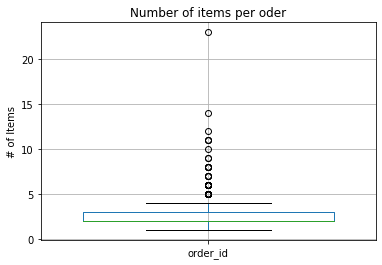

In [24]:
count_data = df_chip.order_id.value_counts()
ax = count_data.plot.box(title = "Number of items per oder", xlim=(0.9,1.1), grid=True)
ax.set_ylabel("# of Items")

### 27) [P] Show a boxplot of the TOTAL number of items per order. Now, you must consider the quantity of each item in each order. (The box plot will be similar to the previous, with the exception that there will be more outliers, and the maximum outlier will be 35.)

Text(0, 0.5, '# of Items')

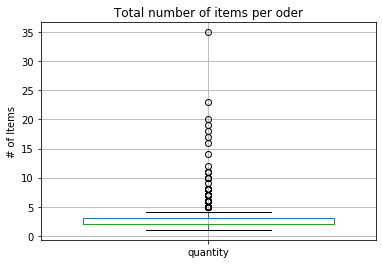

In [25]:
df_chip.head(20)
ax = df_chip.groupby(df_chip.order_id).sum().quantity.plot.box(title = "Total number of items per oder", xlim=(0.9,1.1), grid=True)
ax.set_ylabel("# of Items")

### 28) [P] What were the top 5 ordered items by total quantity? Report the item and its total quantity ordered. Be sure to consider the quantity of each item ordered!

In [26]:
data = df_chip.groupby(df_chip.item_name).sum().sort_values(by="quantity", ascending=False)
data.head(5)

,order_id,quantity,item_price
item_name,,,
Chicken Bowl,713926,761,7342.729980
Chicken Burrito,497303,591,5575.819824
Chips and Guacamole,449959,506,2201.040039
Steak Burrito,328437,386,3851.429932
Canned Soft Drink,304753,351,438.750000


### 29) [P] What is the total number of "Steak Burrito" ordered?

In [27]:
print("Total # of 'Steak Burrito' ordered is: {}".format(data[data.index == "Steak Burrito"].iat[0,1]))

Total # of 'Steak Burrito' ordered is: 386


### 30) [P] What is mean price for an order (NOTE – This is NOT just a mean of the item_price column!)

In [28]:
print("The mean price for an order is ${:.2f}".format(df_chip.groupby(df_chip.order_id).sum().mean().item_price))

The mean price for an order is $18.81


### 31) [P] What was total revenue for the day?

In [29]:
print("Total revenue for the day is ${:.2f}".format(df_chip.item_price.sum()))

Total revenue for the day is $34500.16


### 32) [P] What was the largest total price for a single order? Show the order number and the total price.

In [30]:
data = df_chip.groupby(df_chip.order_id).sum().sort_values(by="item_price", ascending=False)
print("Largest price is ${:.2f} for order {}".format(data.iloc[0,1],data.index[0]))

Largest price is $205.25 for order 926


### 33) [P] Show the entire order to your answer to the previous question (NOTE: This should show you how some orders can contain multiple lines of the same item. Not uncommon!)

In [31]:
df_chip[df_chip.order_id == 926]

,order_id,quantity,item_name,choice_description,item_price
2304,926,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Lettuce]]",9.25
2305,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2306,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2307,926,1,Chicken Bowl,"[Roasted Chili Corn Salsa, [Fajita Vegetables,...",8.75
2308,926,1,Steak Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Lettu...",9.25
2309,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2310,926,1,Steak Burrito,"[Roasted Chili Corn Salsa, [Rice, Cheese, Sour...",9.25
2311,926,1,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",8.75
2312,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce]]",8.75
2313,926,1,Chicken Bowl,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream...",8.75


### 34) [P] What order had the largest total quantity of items purchased? Show the order number and the total number of items

In [32]:
data = df_chip.groupby(df_chip.order_id).sum().sort_values(by="quantity", ascending=False)
print("Order {} has quantity of {}".format(data.index[0], data.iloc[0,0]))

Order 1443 has quantity of 35


### 35) [P] Show the entire order to your answer to the previous question

In [33]:
df_chip[df_chip.order_id == 1443]

,order_id,quantity,item_name,choice_description,item_price
3598,1443,15,Chips and Fresh Tomato Salsa,NaN,44.25
3599,1443,7,Bottled Water,NaN,10.50
3600,1443,1,6 Pack Soft Drink,[Coke],6.49
3601,1443,3,Veggie Burrito,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",33.75
3602,1443,4,Chicken Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",35.00
3603,1443,3,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",27.75
3604,1443,2,Bottled Water,NaN,3.00


### 36) [P] Recall that this dataset is a set of transactions, where each observation represents one item purchased as part of an order_id. However, the data are not read in this way. You need to transform this dataset to a collection of binary encoded transactions, where each row represents ONE transaction, and the columns are binary encoded variables, with each variable representing ONE item available for purchase at Chipotle. Convert your data. Your resulting data frame should have an index representing the order_id, and columns representing each possible item from the item_name variable. For now, a transaction will ignore the quantity of item purchased. The shape of your resulting data frame should be (1834,50)

In [34]:
df_chip_new = pd.DataFrame(0,columns=df_chip.item_name.cat.categories, index = list(range(1,df_chip.order_id.iloc[-1]+1)))
df_chip_new.index.name = "order_id"

def update(row):
    global df_chip_new
    #df_chip_new.loc[row.order_id, row.item_name] += row.quantity
    df_chip_new.loc[row.order_id, row.item_name] = 1

df_chip.apply(lambda row: update(row), axis=1)
df_chip_new.shape

(1834, 50)

### 37) [P] Show the first 10 observations from your transaction data

In [35]:
df_chip_new.head(10)

,6 Pack Soft Drink,Barbacoa Bowl,Barbacoa Burrito,Barbacoa Crispy Tacos,Barbacoa Salad Bowl,Barbacoa Soft Tacos,Bottled Water,Bowl,Burrito,Canned Soda,...,Steak Crispy Tacos,Steak Salad,Steak Salad Bowl,Steak Soft Tacos,Veggie Bowl,Veggie Burrito,Veggie Crispy Tacos,Veggie Salad,Veggie Salad Bowl,Veggie Soft Tacos
order_id,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### 38) [P] Too often, many start by considering a minimum support that is arbitrarily large. Go ahead and use the apriori method to generate frequent itemsets with a minsup value of 0.5. What happened?

There are no itemsets that have a minsupport of 0.5.

In [36]:
apriori(df_chip_new, use_colnames=True) # default is 0.5

,support,itemsets


### 39) [P] Take a step back. Your previous outcome is why you ALWAYS perform essential EDA tasks before you dive into mining a dataset! Report a table that shows the number of transactions each item occurred in, sorted in order of most frequent to least. NOTE: That number essentially represents the absolute support for 1- itemsets! So, include a column that shows the relative support (i.e. the fraction of total transactions.) (HINT: The item with the highest support is 33.5%!)

In [37]:
df_chip_items = pd.DataFrame(0,index=df_chip.item_name.cat.categories, columns = ["# of Transactions", "Relative Support %"])
df_chip_items.index.name = "Item Name"
def count_rows(col):
    count = col.replace(0,np.nan).count()         
    df_chip_items.loc[col.name] = [count,round(100*count/1834,1)]
    
df_chip_new.apply(lambda col: count_rows(col))
df_chips_items = df_chip_items.sort_values(by="Relative Support %", ascending = False)
df_chips_items.head()

,# of Transactions,Relative Support %
Item Name,,
Chicken Bowl,615,33.5
Chicken Burrito,489,26.7
Chips and Guacamole,474,25.8
Steak Burrito,342,18.6
Canned Soft Drink,276,15.0


### 40) [P] Now, make a smarter decision. Like many large, real-world transaction datasets, data is sparse! You have many variables, and most observations use only a handful of them. This is the definition of a sparse dataset. You need a better minsup value. Regenerate frequent itemsets, but now use a minsup of 0.005. How many frequent itemsets were reported? Report your frequent items sorted by decreasing support order.

In [38]:
chip_min_support = apriori(df_chip_new, min_support = 0.005, use_colnames=True).sort_values(by="support", ascending=False)
print("There are {} frequent itemsets with a minimum support of 0.005".format(chip_min_support.shape[0]))
chip_min_support

There are 146 frequent itemsets with a minimum support of 0.005


,support,itemsets
11,0.335333,(Chicken Bowl)
12,0.266630,(Chicken Burrito)
18,0.258451,(Chips and Guacamole)
29,0.186478,(Steak Burrito)
7,0.150491,(Canned Soft Drink)
...,...,...
109,0.005453,"(Chips and Guacamole, Chicken Crispy Tacos)"
132,0.005453,"(Steak Soft Tacos, Steak Burrito)"
131,0.005453,"(Steak Bowl, Veggie Bowl)"
112,0.005453,"(Chicken Salad Bowl, Steak Bowl)"


### 41) [M] In the context of association rules, explain the difference between support, confidence, lift, leverage and conviction.

Ref: https://michael.hahsler.net/research/association_rules/measures.html
Ref: http://www.statsoft.com/Textbook/Association-Rules  
Ref: https://www.ibm.com/support/knowledgecenter/SSEPGG_9.7.0/com.ibm.im.model.doc/c_lift_in_an_association_rule.html  



Support - Relative frequency of the body or head of the rule. Gives the proportion of transactions which contain X. P(X)  

Confidence - Conditional probability of the head given the body of the rule. Probability of seeing the rule's consequent under the condition that the transactions also contain the antecedent. P(Y|X) --> (support)/(antecedent support) 

Lift - Ratio of the confidence of the rule and the expected confidence of the rule. Measures how many times more often X and Y occur together than expected if they were statistically independent. Lift value of 1 indicates independence between X & Y. P(XnY)/(P(X)P(Y))  

Leverage - Measures the difference of X and Y appearing together in the data set and what would be expected if X and Y were statistically dependent. Range is [-1,1] and 0 indicates independence. P(XnY)-P(X)P(Y)  

Conviction - Compares the probability that X appears without Y if they were dependent on the actual frequency of the appearance of X without Y. P(X)P(-Y)/(P(Xn-Y))  




### 42) [P] Generate all association rules that meet a minimum support of 0.01. How many rules were output in total?

In [39]:
rules = association_rules(chip_min_support, metric="support", min_threshold=0.01)
print("There are {} rules that have a minimum support of 0.01".format(rules.shape[0]))

There are 108 rules that have a minimum support of 0.01


### 43) [P] Show only the rules that have a lift > 2, but sorted in order of decreasing confidence. What is your strongest rule?

My strongest rule is "given an order contains bottled water and chips, a chicken bowl will also be present in the order". 

In [40]:
rules[rules['lift']>=2].sort_values(by="confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
56,"(Bottled Water, Chips)",(Chicken Bowl),0.019084,0.335333,0.015267,0.800000,2.385691,0.008868,3.323337
57,"(Bottled Water, Chicken Bowl)",(Chips),0.037623,0.113413,0.015267,0.405797,3.578038,0.011000,1.492061
26,(Canned Soda),(Steak Burrito),0.051254,0.186478,0.019629,0.382979,2.053751,0.010071,1.318467
29,"(Canned Soft Drink, Chicken Bowl)",(Chips),0.060523,0.113413,0.019084,0.315315,2.780232,0.012220,1.294883
58,"(Chips, Chicken Bowl)",(Bottled Water),0.066521,0.083969,0.015267,0.229508,2.733234,0.009681,1.188891
34,(Bottled Water),(Chips),0.083969,0.113413,0.019084,0.227273,2.003934,0.009561,1.147347
59,(Bottled Water),"(Chips, Chicken Bowl)",0.083969,0.066521,0.015267,0.181818,2.733234,0.009681,1.140918
32,(Chips),"(Canned Soft Drink, Chicken Bowl)",0.113413,0.060523,0.019084,0.168269,2.780232,0.012220,1.129544
35,(Chips),(Bottled Water),0.113413,0.083969,0.019084,0.168269,2.003934,0.009561,1.101355
60,(Chips),"(Bottled Water, Chicken Bowl)",0.113413,0.037623,0.015267,0.134615,3.578038,0.011000,1.112080


### 44) [M] Consider yourself the data scientist hired to help Chipotle understand item purchasing patterns. Interpret the following rule for the non data scientist. Be careful not to say, "if your customers purchase canned soft drinks AND chips, they are also going to buy chicken bowls." Think! What do strong association rules convey?

Confidence --> For about 2/3 of orders with (Canned Soft Drink, Chips) there is also a Chicken Bowl in the order.
Lift --> (Canned Soft Drink, Chips) and (Chicken Bowl) occur in the same transaction more often than the average combination of two items.

Seems that this doesn't really mean much. Since about 1/3 of all orders contain chicken bowls, it makes sense that most combinations with a chicken bowl as the consequent will have a lift > 1.




### 45) [P] Suppose your boss is interested in what items are most likely related to a purchase of "Chips and Guacamole". Using your rule set generated, first select the rules that have "Chips and Guacamole" listed in the consequent itemset. Sort the rules by confidence, then by lift. And interpret your findings. Identify the item(s) that are the most suggestive of including "Chips and Guacamole" when purchased, and state why.

I think the lift is a better value to look at compared to confidence when analyzing this problem. The following antecedents have a lift > 1:
(6 Pack Soft Drink), (Veggie Burrito), (Veggie Bowl), (Chicken Soft Tacos), (Steak Bowl). All these items have > 25% confidence, so this means that more than a quarter of all orders of each antecedent have chips and guacamole as well. 

In [41]:
rules[rules.consequents == {'Chips and Guacamole'}].sort_values(by=["confidence", "lift"], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
93,(6 Pack Soft Drink),(Chips and Guacamole),0.029444,0.258451,0.011450,0.388889,1.504688,0.003841,1.213443
40,(Veggie Burrito),(Chips and Guacamole),0.049618,0.258451,0.016903,0.340659,1.318079,0.004079,1.124682
63,(Veggie Bowl),(Chips and Guacamole),0.044711,0.258451,0.014722,0.329268,1.274004,0.003166,1.105581
38,(Chicken Soft Tacos),(Chips and Guacamole),0.058342,0.258451,0.017448,0.299065,1.157143,0.002370,1.057943
23,(Steak Bowl),(Chips and Guacamole),0.102508,0.258451,0.028899,0.281915,1.090785,0.002405,1.032675
89,(Barbacoa Burrito),(Chips and Guacamole),0.047983,0.258451,0.011996,0.250000,0.967300,-0.000406,0.988731
1,(Chicken Bowl),(Chips and Guacamole),0.335333,0.258451,0.081243,0.242276,0.937416,-0.005424,0.978653
5,(Chicken Burrito),(Chips and Guacamole),0.266630,0.258451,0.062159,0.233129,0.902022,-0.006752,0.966979
19,(Canned Soft Drink),(Chips and Guacamole),0.150491,0.258451,0.033806,0.224638,0.869168,-0.005089,0.956390
9,(Steak Burrito),(Chips and Guacamole),0.186478,0.258451,0.041439,0.222222,0.859822,-0.006756,0.953420


### 46) [P] These data suggest that the "Chicken Bowl" is the single most frequent item purchased for this particular location. Great. Let's dive into those chicken bowls more. As you know, Chipotle lets you customize your items. That's what the choice_description field is for. Process all of the items listed in the "choice_description" field by creating a new transaction dataset representing binary encoded transaction data for only Chicken Bowl. Note – this is tricky because the choice_description variable is read in as a long string. The string itself represents a list, and quite often, it's a list of lists. You need to process this to be an actual flattened list of items. Then, you can easily convert these to transactions. This page will give you an idea on how to do it. https://chrisalbon.com/python/data_wrangling/pandas_expand_cells_containing_lists/ . However, keep in mind that many of these lists contain lists themselves! You may need to just write a python function that takes in a list of lists, and returns a single list of all of the items flattened out. Then, apply that function.

In [52]:
# Ref: https://www.geeksforgeeks.org/python-removing-unwanted-characters-from-string/
def update(row):
    global df_enc
    row_list = row.tag.split(",")
    row_list = row_list[:len(row_list)-1] # remove "" at end of row_list
    for item in row_list:
        df_enc.loc[row.name, item] = 1  
    
# return flattened in_list
def parseList(in_list):
    parse_list = str(in_list).replace("[", "").replace("]","").split(", ")
    ret_list = ""
    for word in parse_list:
        ret_list += (word + ", ")
    return ret_list

def combineList(in_list):
    global full_topping_list
    add_list = in_list.split(",")
    full_topping_list = full_topping_list + add_list[:len(add_list)-1] # remove "" at end of add_list

    
# get all chicken bowl orders
df_cb = df_chip[df_chip.item_name == "Chicken Bowl"]

# each index contains list of toppings for given order
df_toppings = pd.DataFrame({"tag": df_cb.choice_description.apply(lambda row: parseList(row))})

# obtain list of all toppings ordered (includes overlaps)
full_topping_list = []
df_toppings.tag.apply(lambda row: combineList(row))

# obtain a dataframe of all toppings ordered (does not include overlaps)
df_cat_toppings = pd.DataFrame({"tag": full_topping_list})

# convert toppings column to a categorical variable
df_cat_toppings.tag = pd.Categorical(df_cat_toppings.tag)

# create encoded dataframe
df_enc = pd.DataFrame(0, columns = df_cat_toppings.tag.cat.categories, index = df_toppings.index)
# fill encoded dataframe
df_toppings.apply(lambda row: update(row), axis=1)

df_enc.head()

,tag
0,Tomatillo-Red Chili Salsa (Hot)
1,Black Beans
2,Rice
3,Cheese
4,Sour Cream
...,...
3978,Fresh Tomato Salsa
3979,Rice
3980,Black Beans
3981,Cheese


In [43]:
df_enc.shape

(726, 23)

### 47) [P,M] Use your own knowledge to generate strong frequent patterns and association rules for the choice_description items used with Chicken Bowls. Explain your findings.

Rice, Cheese, Lettuce, Sour Cream and Black Beans are the most popular chicken bowl toppings, respectively. This is shown below with the raw count and the support stats that include combinations of these 5 items.  

I hypothesized that people would either get cheese or sour cream, but not both, more often than not because this is what I do. I generated two rule sets using rice as the control variable since it is the most freqent topping. The first rule set has an antecedent of (Cheese, Rice) and the second has (Sour Cream, Rice). Both rule sets are very similar, so I suppose people like getting a lot of dairy on their chicken bowls.  

I then wanted to see which items were and were not frequently ordered when guacamole is included in the antecedents. I found that Guacamole as an antecedent is slightly negatively correlated with rice, lettuce, and rice and lettuce. This negative correlation is slight, so I am not sure how strong of a rule this is. I also noticed that sour cream is a popular combination with guacamole. 

In [44]:
df_enc.apply(sum).sort_values(ascending=False).head()

 Rice           684
 Cheese         549
 Lettuce        443
 Sour Cream     427
 Black Beans    386
dtype: int64

In [45]:
apriori(df_enc, use_colnames=True).sort_values(by="support",ascending=False) # default is 0.5

,support,itemsets
3,0.942149,( Rice)
1,0.756198,( Cheese)
6,0.725895,"( Cheese, Rice)"
2,0.610193,( Lettuce)
4,0.588154,( Sour Cream)
8,0.588154,"( Rice, Lettuce)"
9,0.573003,"( Sour Cream, Rice)"
0,0.531680,( Black Beans)
5,0.508264,"( Rice, Black Beans)"
7,0.506887,"( Cheese, Sour Cream)"


In [46]:
df_enc_apr = apriori(df_enc, min_support = 0.005, use_colnames=True)
rules = association_rules(df_enc_apr, metric="support", min_threshold=0.2)
display(rules[rules.antecedents == {" Cheese", " Rice"}].sort_values(by="lift", ascending=False))
display(rules[rules.antecedents == {" Sour Cream", " Rice"}].sort_values(by="lift", ascending=False))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
188,"( Cheese, Rice)","( Sour Cream, Black Beans)",0.725895,0.320937,0.279614,0.385199,1.200235,0.046648,1.104526
257,"( Cheese, Rice)","( Sour Cream, Fresh Tomato Salsa)",0.725895,0.245179,0.213499,0.294118,1.199603,0.035524,1.069330
229,"( Cheese, Rice)","( Sour Cream, Lettuce)",0.725895,0.377410,0.323691,0.445920,1.181526,0.049731,1.123646
120,"( Cheese, Rice)",( Sour Cream),0.725895,0.588154,0.497245,0.685009,1.164677,0.070307,1.307486
214,"( Cheese, Rice)","( Sour Cream, Guacamole)",0.725895,0.246556,0.207989,0.286528,1.162117,0.029015,1.056023
173,"( Cheese, Rice)","( Black Beans, Lettuce)",0.725895,0.331956,0.269972,0.371917,1.120379,0.029007,1.063623
48,"( Cheese, Rice)",( Black Beans),0.725895,0.531680,0.421488,0.580645,1.092094,0.035543,1.116762
102,"( Cheese, Rice)",( Lettuce),0.725895,0.610193,0.476584,0.656546,1.075966,0.033648,1.134963
243,"( Cheese, Rice)","(Fresh Tomato Salsa, Lettuce)",0.725895,0.264463,0.202479,0.278937,1.054732,0.010507,1.020074
90,"( Cheese, Rice)",( Guacamole),0.725895,0.388430,0.285124,0.392789,1.011224,0.003165,1.007180


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
217,"( Sour Cream, Rice)","( Cheese, Guacamole)",0.573003,0.297521,0.207989,0.362981,1.220019,0.037509,1.102760
233,"( Sour Cream, Rice)","( Cheese, Lettuce)",0.573003,0.487603,0.323691,0.564904,1.158532,0.044293,1.177663
122,"( Sour Cream, Rice)",( Cheese),0.573003,0.756198,0.497245,0.867788,1.147567,0.063941,1.844027
261,"( Sour Cream, Rice)","( Cheese, Fresh Tomato Salsa)",0.573003,0.329201,0.213499,0.372596,1.131819,0.024865,1.069166
190,"( Sour Cream, Rice)","( Cheese, Black Beans)",0.573003,0.435262,0.279614,0.487981,1.121120,0.030208,1.102963
144,"( Sour Cream, Rice)",( Guacamole),0.573003,0.388430,0.238292,0.415865,1.070632,0.015721,1.046968
150,"( Sour Cream, Rice)",( Lettuce),0.573003,0.610193,0.371901,0.649038,1.063661,0.022259,1.110683
201,"( Sour Cream, Rice)","( Black Beans, Lettuce)",0.573003,0.331956,0.201102,0.350962,1.057253,0.010890,1.029283
78,"( Sour Cream, Rice)",( Black Beans),0.573003,0.531680,0.314050,0.548077,1.030839,0.009395,1.036282
163,"( Sour Cream, Rice)",(Fresh Tomato Salsa),0.573003,0.446281,0.239669,0.418269,0.937233,-0.016051,0.951848


In [47]:
sel = rules.apply(lambda row: " Guacamole" in row.antecedents, axis = 1)
display(rules[sel].sort_values(by="lift", ascending = False))

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
211,"( Cheese, Rice, Guacamole)",( Sour Cream),0.285124,0.588154,0.207989,0.729469,1.240267,0.040292,1.522358
216,"( Cheese, Guacamole)","( Sour Cream, Rice)",0.297521,0.573003,0.207989,0.699074,1.220019,0.037509,1.418945
97,"( Cheese, Guacamole)",( Sour Cream),0.297521,0.588154,0.212121,0.712963,1.212204,0.037133,1.434817
219,"( Sour Cream, Guacamole)","( Cheese, Rice)",0.246556,0.725895,0.207989,0.843575,1.162117,0.029015,1.752312
213,"( Sour Cream, Rice, Guacamole)",( Cheese),0.238292,0.756198,0.207989,0.872832,1.154237,0.027793,1.917168
98,"( Sour Cream, Guacamole)",( Cheese),0.246556,0.756198,0.212121,0.860335,1.137711,0.025676,1.745620
61,"( Rice, Guacamole)",( Black Beans),0.365014,0.531680,0.220386,0.603774,1.135595,0.026315,1.181949
218,"( Rice, Guacamole)","( Cheese, Sour Cream)",0.365014,0.506887,0.207989,0.569811,1.124139,0.022968,1.146271
3,( Guacamole),( Black Beans),0.388430,0.531680,0.231405,0.595745,1.120494,0.024884,1.158475
65,( Guacamole),"( Rice, Black Beans)",0.388430,0.508264,0.220386,0.567376,1.116301,0.022961,1.136635
